In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [2]:
try:
    df = pd.read_csv('housing.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'housing.csv' not found. Please ensure the file is in the correct directory.")
    exit()

Dataset loaded successfully.


In [10]:
print("\n--- Simple Pandas Operations ---")
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing Values Count per Column:")
print(df.isnull().sum())


--- Simple Pandas Operations ---

First 5 rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   i

In [4]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nNumerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Numerical Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical Features: ['ocean_proximity']


Generating Histograms for numerical features...


<Figure size 1800x1500 with 0 Axes>

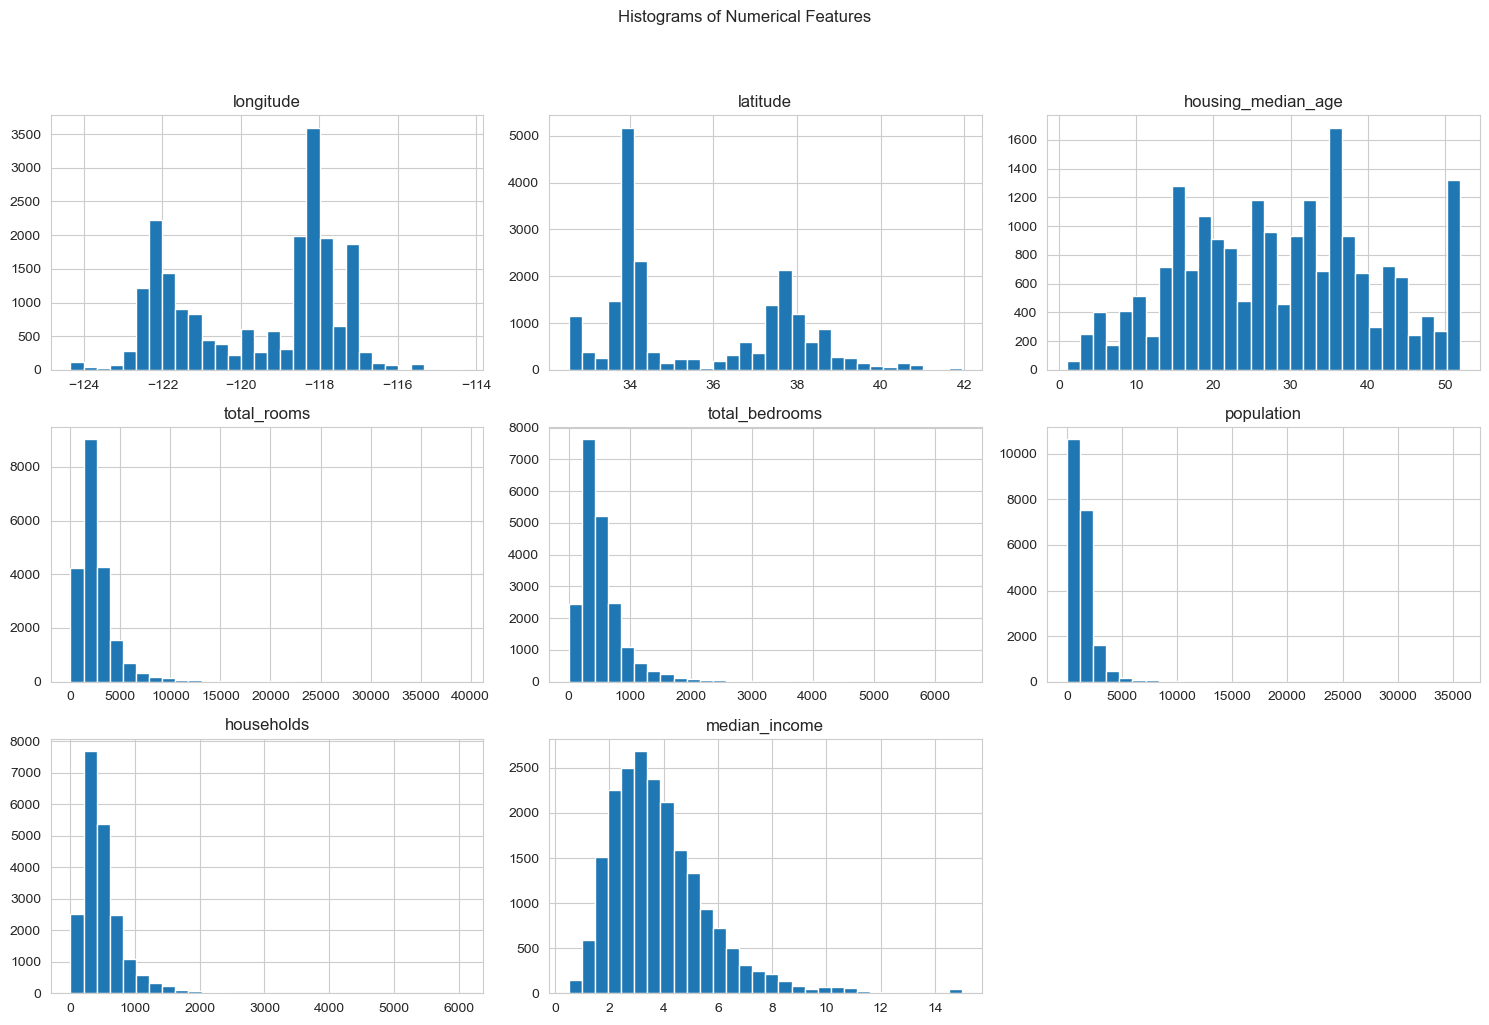

Generating Scatter plot: Median House Value vs. Median Income...


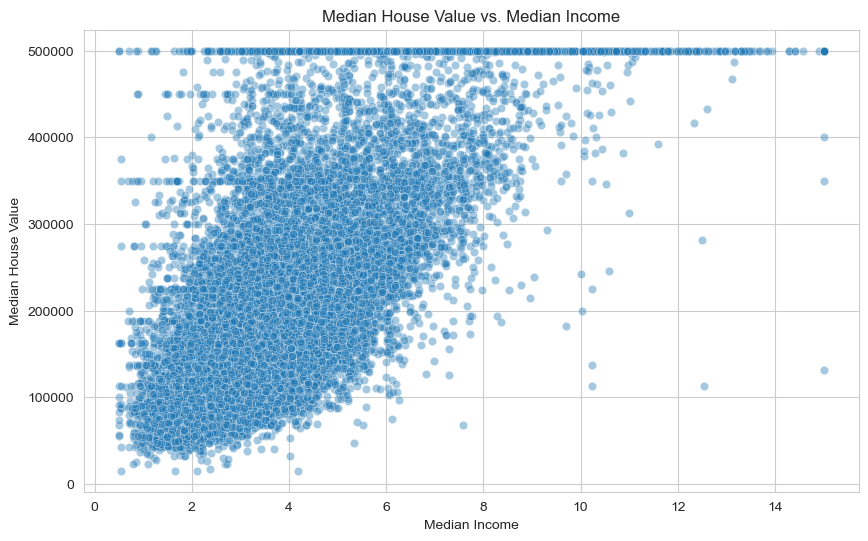

Generating Box plot: Ocean Proximity vs. Median House Value...


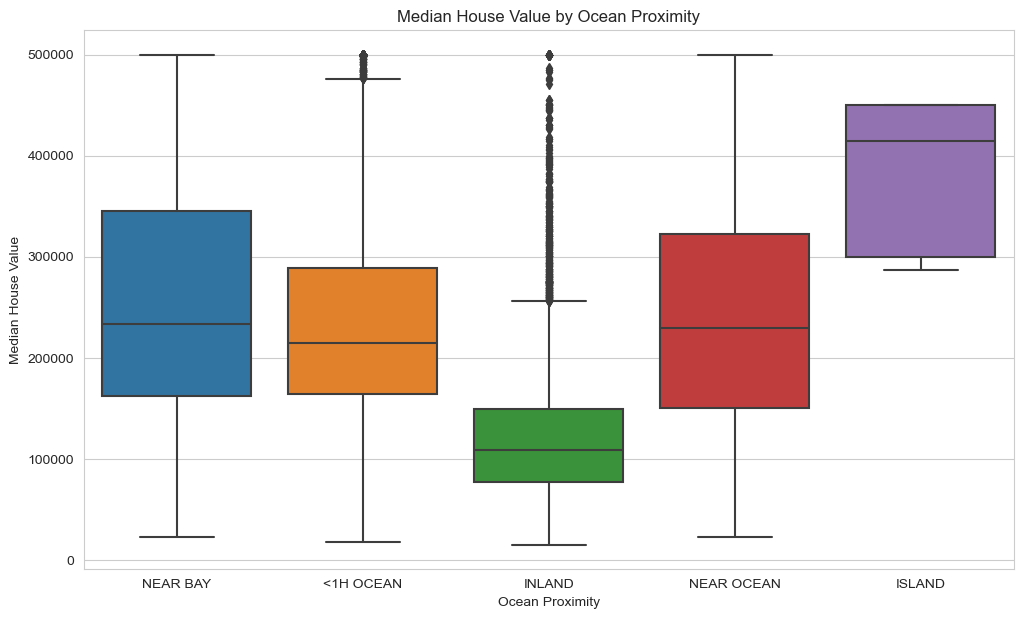

In [5]:
sns.set_style("whitegrid")
plt.figure(figsize=(18, 15))

# Histograms
print("Generating Histograms for numerical features...")
df[numerical_features].hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

# Scatter plot
print("Generating Scatter plot: Median House Value vs. Median Income...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.4)
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Box plot
if 'ocean_proximity' in categorical_features:
    print("Generating Box plot: Ocean Proximity vs. Median House Value...")
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
    plt.title('Median House Value by Ocean Proximity')
    plt.xlabel('Ocean Proximity')
    plt.ylabel('Median House Value')
    plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

print("\n--- Linear Regression ---")
linear_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', LinearRegression())])

print("Training Linear Regression model...")
linear_reg_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_lr = linear_reg_pipeline.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Linear Regression - Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"Linear Regression - R-squared (R2): {r2_lr:.2f}")

Training set size: 16512 samples
Testing set size: 4128 samples

--- Linear Regression ---
Training Linear Regression model...
Linear Regression - Mean Squared Error (MSE): 4908290571.35
Linear Regression - Root Mean Squared Error (RMSE): 70059.19
Linear Regression - R-squared (R2): 0.63


In [7]:
print("\n---  Random Forest Regressor ---")
random_forest_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                             ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])

# Train the model
print("Training Random Forest Regressor model...")
random_forest_reg_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_reg_pipeline.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest Regressor - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest Regressor - R-squared (R2): {r2_rf:.2f}")


---  Random Forest Regressor ---
Training Random Forest Regressor model...
Random Forest Regressor - Mean Squared Error (MSE): 2395290032.47
Random Forest Regressor - Root Mean Squared Error (RMSE): 48941.70
Random Forest Regressor - R-squared (R2): 0.82


In [8]:
print("\n---  Logistic Regression (for Classification) ---")
median_value_threshold = df['median_house_value'].median()
df['is_high_value'] = (df['median_house_value'] > median_value_threshold).astype(int)
print(f"Binary target 'is_high_value' created based on median_house_value > {median_value_threshold:.2f}")

# Define X_clf and y_clf 
X_clf = df.drop(['median_house_value', 'is_high_value'], axis=1)
y_clf = df['is_high_value']

# Split data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)
print(f"Training set size for classification: {X_train_clf.shape[0]} samples")
print(f"Testing set size for classification: {X_test_clf.shape[0]} samples")

logistic_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('classifier', LogisticRegression(solver='liblinear', random_state=42, n_jobs=-1))])

print("Training Logistic Regression model...")
logistic_reg_pipeline.fit(X_train_clf, y_train_clf)

# Make predictions
y_pred_logreg = logistic_reg_pipeline.predict(X_test_clf)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test_clf, y_pred_logreg)
print(f"Logistic Regression - Accuracy: {accuracy_logreg:.2f}")

print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test_clf, y_pred_logreg))

print("\nLogistic Regression - Confusion Matrix:")
cm_logreg = confusion_matrix(y_test_clf, y_pred_logreg)
print(cm_logreg)


---  Logistic Regression (for Classification) ---
Binary target 'is_high_value' created based on median_house_value > 179700.00
Training set size for classification: 16512 samples
Testing set size for classification: 4128 samples
Training Logistic Regression model...


D:\anaconda\envs\KKR\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


Logistic Regression - Accuracy: 0.84

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2065
           1       0.83      0.84      0.84      2063

    accuracy                           0.84      4128
   macro avg       0.84      0.84      0.84      4128
weighted avg       0.84      0.84      0.84      4128


Logistic Regression - Confusion Matrix:
[[1718  347]
 [ 322 1741]]


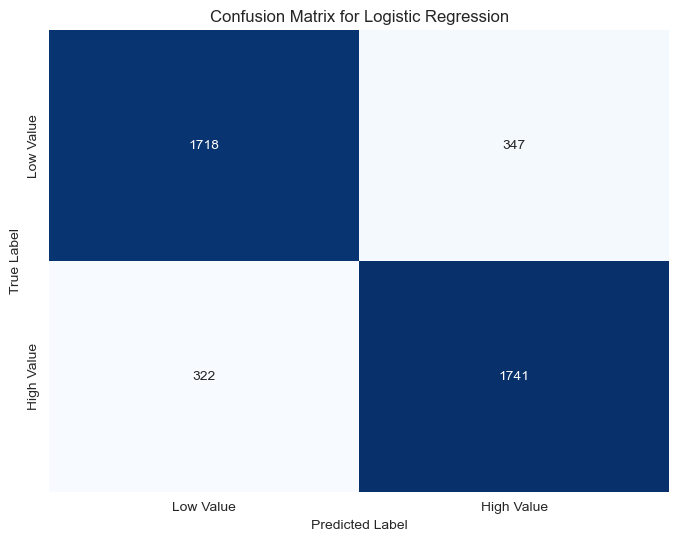

In [9]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low Value', 'High Value'], yticklabels=['Low Value', 'High Value'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()